In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nolds

/home/linseven/miniconda3/envs/igwn-py39/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Load the data
file_path = "563 radio pulses burst of SGR 1935+2154.csv"
pulses_burst_frame = pd.read_csv(file_path,na_values=["", " "])
pulses_burst_frame[" Cntrl freq.(MHz) "] = pd.to_numeric(pulses_burst_frame[" Cntrl freq.(MHz) "], errors="coerce")
pulses_burst_frame["day"] = pulses_burst_frame[" ToA(MJD) "].astype(int)
pulses_burst_frame

,Pulse,Rot. period,Tstart/ Tob,ToA(MJD),Width(ms),Peak flux(mJy),Fluence(Jyms),Energy(erg),Cntrl freq.(MHz),Bandwidth(MHz),DM(pc cm-3)%,day
0,1,1,59131.3843958 / 1.0,59131.38471,4.2 (2),47.1 (26),0.020 (2),1.31,1277.0,69,332.5 (5)%,59131
1,2,,/,59131.38471,4.1 (4),24.6 (14),0.010 (2),0.61,1236.0,86,332.5 (5)%,59131
2,3,2,/,59131.38697,4.6 (4),30.0 (17),0.014 (2),0.91,1230.0,154,333.0 (9)%,59131
3,4,3,/,59131.38727,23.7 (15),17.3 (10),0.040 (4),2.64,1256.0,253,333.3 (3)%,59131
4,5,4,/,59131.38813,4.9 (4),29.0 (16),0.014 (2),0.91,NaN,,332.2 (5)%,59131
...,...,...,...,...,...,...,...,...,...,...,...,...
558,559,473,/,59152.48871,4.1 (3),9.4 (5),0.030 (3),2.03,1135.0,213,332.2 (7)%,59152
559,560,474,/,59152.49097,4.9 (4),23.5 (11),0.011 (1),0.71,NaN,,331.5 (6)%,59152
560,561,475,/,59152.49108,2.5 (2),10.0 (5),0.019 (2),1.32,1131.0,156,333.1 (9)%,59152
561,562,476,/,59152.49130,6.9 (5),18.9 (9),0.013 (1),0.81,1135.0,152,333.0 (7)%,59152


In [4]:
counter = Counter(pulses_burst_frame["day"])
most_common_element = counter.most_common(1)[0]
second_most_common_element = counter.most_common(2)[1]
print("most number of burst",most_common_element,"second most burst", second_most_common_element)

most number of burst (59132, 139) second most burst (59133, 137)


In [5]:
arrival_times = pulses_burst_frame[" ToA(MJD) "]
Energy = pulses_burst_frame[" Energy(erg) "]
central_freq = pulses_burst_frame[" Cntrl freq.(MHz) "]

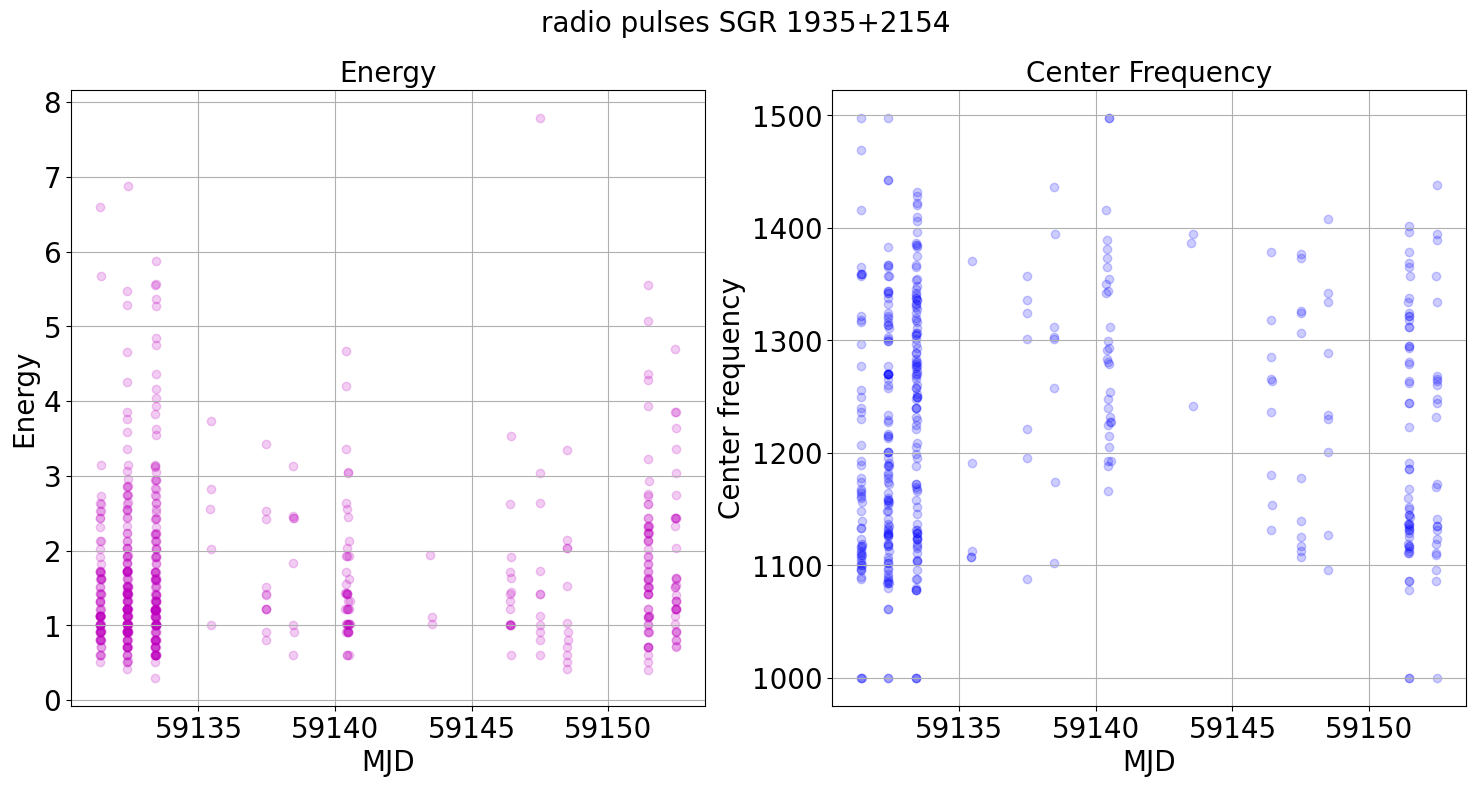

In [6]:
plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1)
plt.scatter(arrival_times, Energy, c='m', alpha=0.2)
plt.xlabel('MJD', fontsize=20)
plt.ylabel('Energy',fontsize=20)
plt.tick_params(axis = 'both', labelsize=20)
# plt.yscale('log')
plt.grid(True)
plt.title("Energy",fontsize=20)

plt.subplot(1, 2, 2)
plt.scatter(arrival_times, central_freq, c='blue', alpha=0.2)
plt.xlabel('MJD', fontsize=20)
plt.ylabel('Center frequency',fontsize=20)
plt.tick_params(axis = 'both', labelsize=20)
# plt.yscale('log')
plt.grid(True)
plt.title("Center Frequency",fontsize=20)
plt.suptitle("radio pulses SGR 1935+2154", fontsize=20)

plt.show()

In [7]:
pulses_59132 = pulses_burst_frame[pulses_burst_frame["day"] == 59132]
pulses_59133 = pulses_burst_frame[pulses_burst_frame["day"] == 59133]

In [8]:
arrival_times_59132 = pulses_59132[" ToA(MJD) "].values
arrival_times_59133 = pulses_59133[" ToA(MJD) "].values
energy_59132 = pulses_59132[" Energy(erg) "].values
energy_59133 = pulses_59133[" Energy(erg) "].values
central_freq_59132 = pulses_59132[" Cntrl freq.(MHz) "].values
# central_freq_59132 = central_freq_59132[~np.isnan(central_freq_59132)]
central_freq_59133 = pulses_59133[" Cntrl freq.(MHz) "].values
# central_freq_59133 = central_freq_59133[~np.isnan(central_freq_59133)]

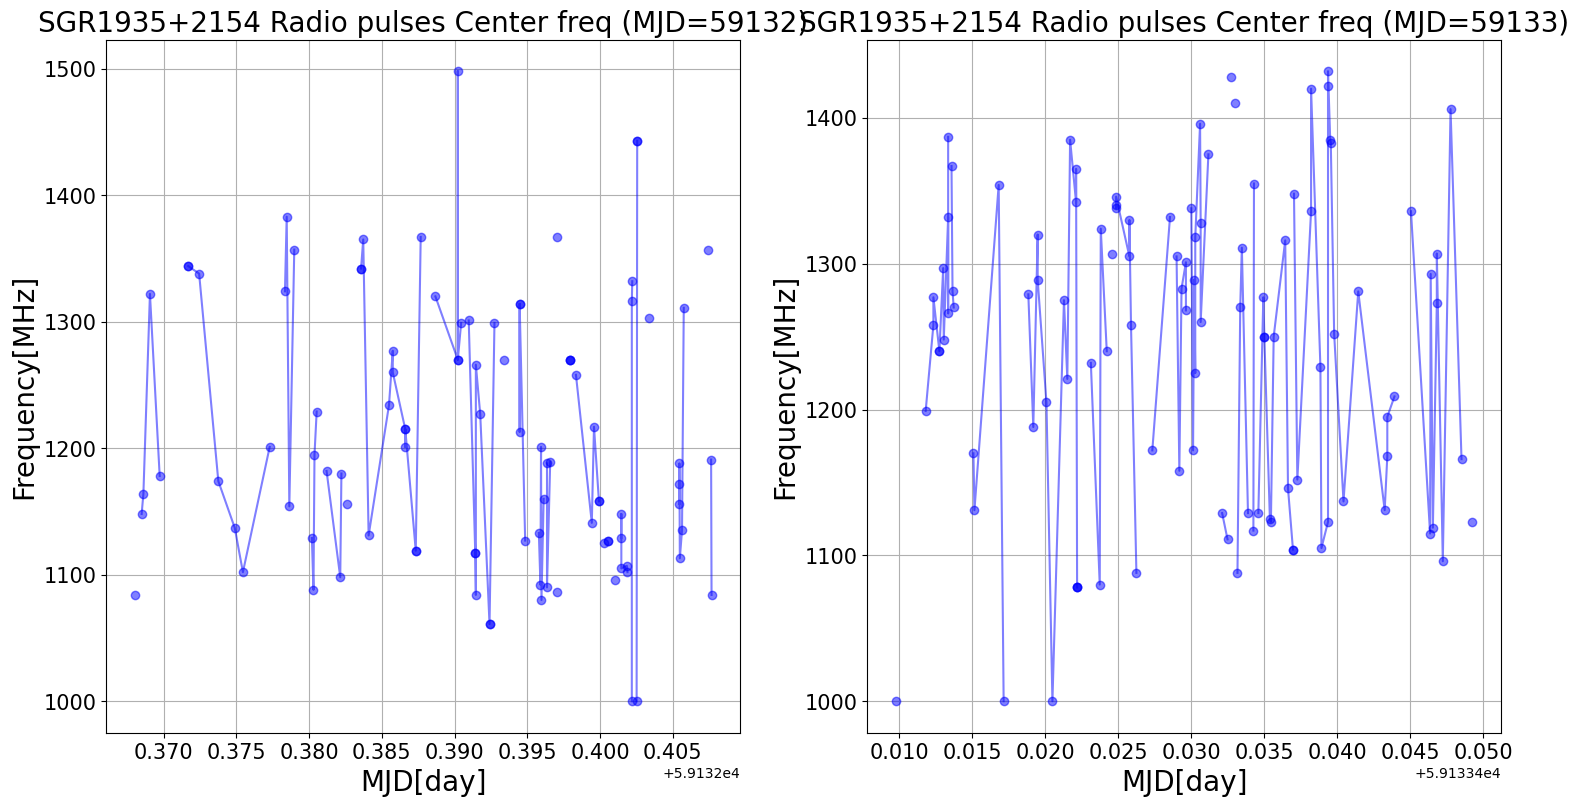

In [9]:
plt.figure(figsize=(18, 9))

plt.subplot(1, 2, 1)
plt.plot(arrival_times_59132, central_freq_59132, c='blue', alpha=0.5,marker='o')
plt.xlabel('MJD[day]', fontsize=20)
plt.ylabel('Frequency[MHz]', fontsize=20)
plt.tick_params(axis = 'both', labelsize=15)
# plt.yscale('log')
plt.title('SGR1935+2154 Radio pulses Center freq (MJD=59132)',fontsize=20)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(arrival_times_59133, central_freq_59133, c='blue', alpha=0.5, marker='o')
plt.xlabel('MJD[day]', fontsize=20)
plt.ylabel('Frequency[MHz]', fontsize=20)
plt.tick_params(axis = 'both', labelsize=15)
# plt.yscale('log')
plt.title('SGR1935+2154 Radio pulses Center freq (MJD=59133)',fontsize=20)
plt.grid(True)

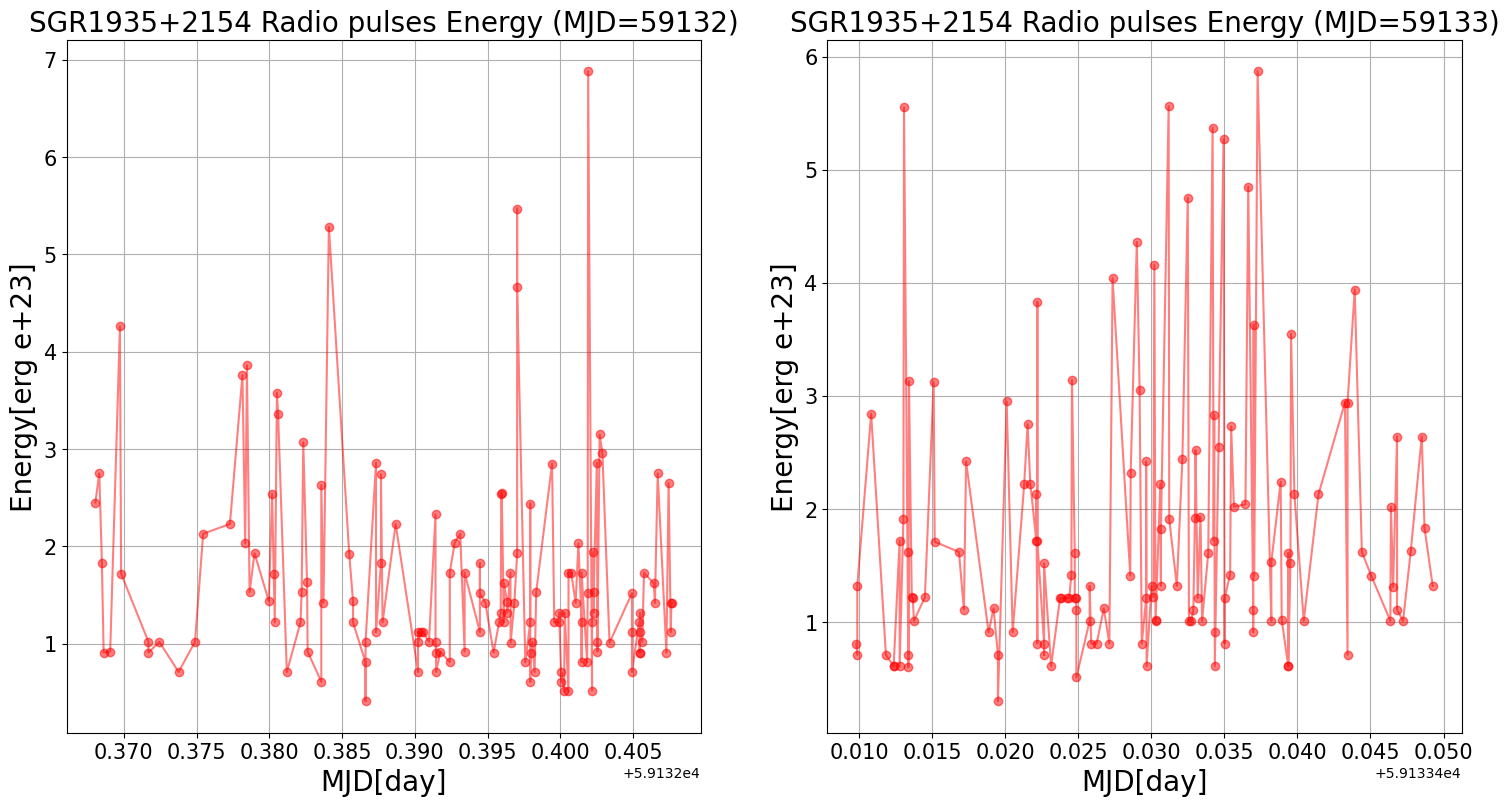

In [10]:
plt.figure(figsize=(18, 9))

plt.subplot(1, 2, 1)
plt.plot(arrival_times_59132, energy_59132, c='r', alpha=0.5,marker='o')
plt.xlabel('MJD[day]', fontsize=20)
plt.ylabel('Energy[erg e+23]', fontsize=20)
plt.tick_params(axis = 'both', labelsize=15)
# plt.yscale('log')
plt.title('SGR1935+2154 Radio pulses Energy (MJD=59132)',fontsize=20)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(arrival_times_59133, energy_59133, c='r', alpha=0.5, marker='o')
plt.xlabel('MJD[day]', fontsize=20)
plt.ylabel('Energy[erg e+23]', fontsize=20)
plt.tick_params(axis = 'both', labelsize=15)
# plt.yscale('log')
plt.title('SGR1935+2154 Radio pulses Energy (MJD=59133)',fontsize=20)
plt.grid(True)

In [11]:
central_freq_59132 = central_freq_59132[~np.isnan(central_freq_59132)]
central_freq_59133 = central_freq_59133[~np.isnan(central_freq_59133)]

In [12]:
waiting_time_59132 = []
for i in range(len(arrival_times_59132)-1):
    waiting_time_59132.append(arrival_times_59132[i+1] - arrival_times_59132[i])
waiting_time_59132 = np.array(waiting_time_59132)
waiting_time_59132 = waiting_time_59132/np.mean(waiting_time_59132)
print("waiting time 59132",waiting_time_59132)

waiting time 59132 [0.94043411 0.62695609 0.41797071 1.56739021 2.33366987 0.27864714
 6.54820799 0.         2.61231701 4.59767795 3.93589095 1.95053004
 6.40888439 2.99545684 0.661787   0.41797071 0.62695609 1.18425037
 3.41342755 0.80111057 0.38313981 0.24381626 0.5224634  0.27864714
 2.08985363 3.27410398 0.27864714 0.38313983 0.90560323 0.13932357
 3.27410398 0.         0.5224634  1.28874306 4.87632509 0.90560323
 0.         2.99545684 0.         0.         2.50782432 0.
 1.18425037 0.         0.38313983 3.13478041 5.36395761 0.
 0.         0.80111054 0.38313983 1.42806664 1.56739021 0.
 0.13932357 0.         1.0449268  2.22917718 0.         1.1842504
 1.32357394 1.0449268  0.         3.65724381 0.         0.
 1.32357394 1.95053004 1.32357397 0.38313983 0.13932357 0.10449267
 0.5224634  0.         0.80111057 0.         0.76627964 0.03483091
 0.90560323 0.66178697 0.         0.         1.95053004 1.18425037
 0.         0.         0.13932357 0.38313983 0.5224634  0.38313983
 3.796567

In [13]:
waiting_time_59133 = []
for i in range(len(arrival_times_59133)-1):
    waiting_time_59133.append(arrival_times_59133[i+1] - arrival_times_59133[i])
waiting_time_59133 = np.array(waiting_time_59133)
waiting_time_59133 = waiting_time_59133/np.mean(waiting_time_59133)
print("waiting time 59133",waiting_time_59133)

waiting time 59133 [0.24119585 0.         3.27337219 3.48011148 1.8261971  0.
 1.41271852 0.         0.89587028 0.13782619 1.03369648 0.
 0.         0.13782619 0.65467443 0.24119585 0.27565241 2.58424119
 2.06739295 0.24119583 5.71978719 1.17152267 0.51684824 5.3063086
 1.17152267 1.03369648 0.         2.06739295 1.41271852 2.72206739
 0.79250065 0.65467443 1.41271852 0.         0.24119583 0.
 0.         1.58500128 0.         0.         1.65391437 2.10184949
 0.24119585 1.41271852 0.51684824 0.51684824 0.13782619 0.65467443
 0.         0.37902204 0.         0.         3.13554599 0.
 0.37902204 1.2748923  1.68837093 1.30934886 0.75804409 4.16924244
 0.10336966 1.44717506 0.65467446 0.51684824 1.03369648 0.
 0.10336963 1.17152267 0.41347861 0.24119585 0.27565239 0.
 1.13706613 0.13782619 0.         1.8261971  0.13782619 1.79174057
 1.30934886 1.27489233 0.27565239 0.51684824 0.51684824 0.37902204
 0.13782619 0.51684824 0.65467446 0.37902204 1.44717506 1.03369648
 0.24119585 0.13782619 0.

In [14]:
energy_change_59132 = []
for i in range(len(energy_59132)-1):
    energy_change_59132.append(energy_59132[i+1] - energy_59132[i])
energy_change_59132 = np.array(energy_change_59132)
# energy_change_59132 = energy_change_59132
# print("energy change 59132",energy_change_59132)

In [15]:
energy_change_59133 = []
for i in range(len(energy_59133)-1):
    energy_change_59133.append(energy_59133[i+1] - energy_59133[i])
energy_change_59133 = np.array(energy_change_59133)
print("energy change 59133",energy_change_59133)

energy change 59133 [-0.1   0.61  1.52 -2.13 -0.1   0.    1.11 -1.11  1.3   3.64 -4.95  1.02
 -0.91  2.42 -1.91 -0.01 -0.2   0.21  1.9  -1.41 -0.09 -0.51  1.31 -1.51
  0.21 -0.41 -0.41  2.65 -2.04  1.31  0.53 -0.53 -0.5   0.41 -1.32  3.02
 -2.11 -0.91 -0.1   0.81 -0.91  0.6   0.    0.    0.    0.21  1.72 -1.53
 -0.4   0.   -0.1  -0.6   0.5   0.31 -0.51  0.    0.31 -0.31  3.23 -2.63
  0.91  2.04 -1.31 -2.24  0.4   1.21 -1.81  0.71 -0.1   2.94 -3.14 -0.01
  1.21 -0.9   0.5   3.74 -3.65 -0.59  1.12  2.31 -3.74  0.    0.1   0.81
  0.6  -1.31  0.72 -0.92  0.6   3.76 -3.65  1.11 -1.92 -0.3   1.94  2.72
 -4.46  0.4   0.21  1.31 -0.71  0.02  2.81 -3.74 -0.2   2.72 -2.22  4.46
 -4.86  0.52  0.71 -1.22 -0.41  1.   -1.    0.91  2.03 -1.42 -1.12  1.12
  0.81 -2.23  2.23  1.   -2.32 -0.21 -0.4   1.01 -0.71  1.33 -1.53 -0.1
  0.62  1.01 -0.81 -0.51]


In [16]:
frequency_change_59132 = []
for i in range(len(central_freq_59132)-1):
    frequency_change_59132.append(central_freq_59132[i+1] - central_freq_59132[i])
frequency_change_59132 = np.array(frequency_change_59132)
# frequency_change_59132 = frequency_change_59132
print("frequency change 59132",frequency_change_59132)

frequency change 59132 [  64.   16.  158. -144.  166.    0.   -6. -164.  -37.  -35.   99.  123.
   59. -229.  203. -228.  -41.  107.   34.  -47.  -84.   82.  -24.  186.
    0.   23. -234.  103.   43.  -17.  -45.  -14.   14.  -96.    0.  248.
  -47.  -50.  228. -228.   29.    2. -184.    0.  -33.  182.  -39. -166.
    0.  238.  -29.   44. -101.  101. -187.    6.  -41.  109. -121.   80.
   28.  -98.   99.  178. -281.  184.    0.    0.  -12. -117.   76.  -59.
    0.  -33.    2.    0.  -31.   33.   19.  -43.    2.   -5. -102.  316.
   16. -332.  443.    0. -140. -147.   16.   16.  -75.   22.  176.   46.
 -166. -107.]


In [17]:
frequency_change_59133 = []
for i in range(len(central_freq_59133)-1):
    frequency_change_59133.append(central_freq_59133[i+1] - central_freq_59133[i])
frequency_change_59133 = np.array(frequency_change_59133)/np.mean(frequency_change_59133)
print("frequency change 59133",frequency_change_59133)

frequency change 59133 [ 174.73170732   51.80487805   16.68292683  -32.48780488    0.
   50.04878049  -43.02439024   73.75609756  -57.95121951  106.24390244
  -17.56097561  -75.51219512   -9.65853659  -87.80487805  -34.24390244
  195.80487805 -310.82926829  244.97560976  -79.90243902  115.90243902
  -27.2195122   -73.75609756 -180.          241.46341463  -47.41463415
  144.          -37.75609756   20.19512195 -252.            0.
    0.          135.2195122  -133.46341463  214.24390244  -73.75609756
   58.82926829   28.97560976   -1.75609756    7.02439024  -36.
   21.95121951  -63.2195122  -149.26829268   73.75609756  140.48780488
  -23.70731707 -129.07317073  109.75609756   15.80487805  -28.97560976
   61.46341463 -145.75609756  102.73170732  -56.19512195   81.65853659
   68.48780488  -59.70731707  -59.70731707  100.97560976 -216.
  -15.80487805  278.34146341  -15.80487805 -282.73170732  159.80487805
   36.         -159.80487805  -10.53658537  208.97560976 -198.43902439
  129.95121951 

In [18]:
print("LLE time series 59132",nolds.lyap_e(waiting_time_59132)[0])
print("LLE time series 59133",nolds.lyap_e(waiting_time_59133)[0])
print("LLE energy series 59132",nolds.lyap_e(energy_change_59132)[0])
print("LLE energy series 59133",nolds.lyap_e(energy_change_59133)[0])
print("LLE frequency series 59132",nolds.lyap_e(frequency_change_59132)[0])
print("LLE frequency series 59133",nolds.lyap_e(frequency_change_59133)[0])

LLE time series 59132 0.031384062
LLE time series 59133 0.08479629
LLE energy series 59132 0.067570664
LLE energy series 59133 0.03809038
LLE frequency series 59132 0.08876855
LLE frequency series 59133 0.0101158


In [19]:
# def claculate PI
def PI(original, shuffle):
    ApEn_max = max(original)
    ApEn_shuffle_max = np.array(shuffle.max())
    PI = ApEn_max/ApEn_shuffle_max
    return np.mean(PI), np.std(PI)
# def ApEn function
def ApEn(U, m, r) -> float:
    """Approximate_entropy."""

    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [
            len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0)
            for x_i in x
        ]
        return (N - m + 1.0) ** (-1) * sum(np.log(C))

    N = len(U)

    return abs(_phi(m + 1) - _phi(m))


In [20]:
print(np.std(waiting_time_59132),np.std(waiting_time_59133))

1.348546287330548 1.1930939042225641


In [21]:
r_t_59132 = np.linspace(0,np.std(waiting_time_59132),100)
wt_apen_59132 = []
for r in r_t_59132:
    wt_apen_59132.append(ApEn(waiting_time_59132, 2, r))
wt_apen_59132 = np.array(wt_apen_59132)
print("waiting time 59132 ApEn",wt_apen_59132)

waiting time 59132 ApEn [0.2430927  0.32148952 0.32148952 0.40985646 0.40985646 0.40985646
 0.41787553 0.41787553 0.61433989 0.61433989 0.61433989 0.92784764
 0.92784764 0.92445098 0.92445098 0.92445098 0.92827031 0.92827031
 0.93080822 0.93080822 0.93080822 0.96453574 0.96453574 0.96453574
 0.9684883  0.9684883  0.96908455 0.96908455 0.96908455 0.93498751
 0.93498751 0.92646904 0.92646904 0.92646904 0.92646904 0.92646904
 0.93444323 0.93444323 0.93444323 0.84217293 0.84217293 0.83285036
 0.83285036 0.83285036 0.83275723 0.83275723 0.83275723 0.80036849
 0.80036849 0.73768774 0.73768774 0.73768774 0.73529526 0.73529526
 0.73555768 0.73555768 0.73555768 0.70509965 0.70509965 0.65927545
 0.65927545 0.65927545 0.65733569 0.65733569 0.65697641 0.65697641
 0.65697641 0.61263599 0.61263599 0.61263599 0.59488627 0.59488627
 0.59488627 0.59488627 0.59488627 0.58781105 0.58781105 0.56273179
 0.56273179 0.56273179 0.5539847  0.5539847  0.5539847  0.5539847
 0.5539847  0.55233539 0.55233539 0.529

In [22]:
r_t_59133 = np.linspace(0,np.std(waiting_time_59133),100)
wt_apen_59133 = []
for r in r_t_59133:
    wt_apen_59133.append(ApEn(waiting_time_59133, 2, r))
wt_apen_59133 = np.array(wt_apen_59133)
print("waiting time 59133 ApEn",wt_apen_59133)

waiting time 59133 ApEn [0.18954476 0.22422721 0.22422721 0.30630136 0.30630136 0.30630136
 0.30409374 0.30409374 0.30409374 0.52795208 0.52795208 0.52795208
 0.88134536 0.88134536 0.88134536 0.87265234 0.87265234 0.87265234
 0.87991774 0.87991774 0.87991774 0.9450033  0.9450033  0.9953432
 0.9953432  0.9953432  0.98984518 0.98984518 0.98984518 0.99196531
 0.99196531 0.99196531 0.92094377 0.92094377 0.92094377 0.916684
 0.916684   0.916684   0.91274568 0.91274568 0.91274568 0.91176792
 0.91176792 0.83400036 0.83400036 0.83400036 0.83395158 0.83395158
 0.83395158 0.83395158 0.83395158 0.83395158 0.83610443 0.83610443
 0.83610443 0.80183853 0.80183853 0.80183853 0.80117525 0.80117525
 0.80117525 0.80045226 0.80045226 0.78352519 0.78352519 0.78352519
 0.74070356 0.74070356 0.74070356 0.74030659 0.74030659 0.74030659
 0.73828477 0.73828477 0.73828477 0.69127561 0.69127561 0.69127561
 0.66449702 0.66449702 0.66449702 0.66530714 0.66530714 0.65346437
 0.65346437 0.65346437 0.60828866 0.60828

In [23]:
# at 59132
# Adt_results_59132 = pd.DataFrame(columns=[f'iteration_{i+1}' for i in range(100)])
# for i in range(100):
#     np.random.shuffle(waiting_time_59132)
#     apen = [ApEn(waiting_time_59132, 2, r) for r in r_t_59132]
#     Adt_results_59132[f'iteration_{i+1}'] = apen
# Adt_results_59132

In [24]:
# at 59133
# Adt_results_59133 = pd.DataFrame(columns=[f'iteration_{i+1}' for i in range(100)])
# for i in range(100):
#     np.random.shuffle(waiting_time_59133)
#     apen = [ApEn(waiting_time_59133, 2, r) for r in r_t_59133]
#     Adt_results_59133[f'iteration_{i+1}'] = apen
# Adt_results_59133

In [25]:
# Adt_results_59132.to_csv('Adt_results_59132.csv',index=False)
# Adt_results_59133.to_csv('Adt_results_59133.csv',index=False)

In [26]:
Adt_results_59132 = pd.read_csv('Adt_results_59132.csv')
Adt_results_59133 = pd.read_csv('Adt_results_59133.csv')

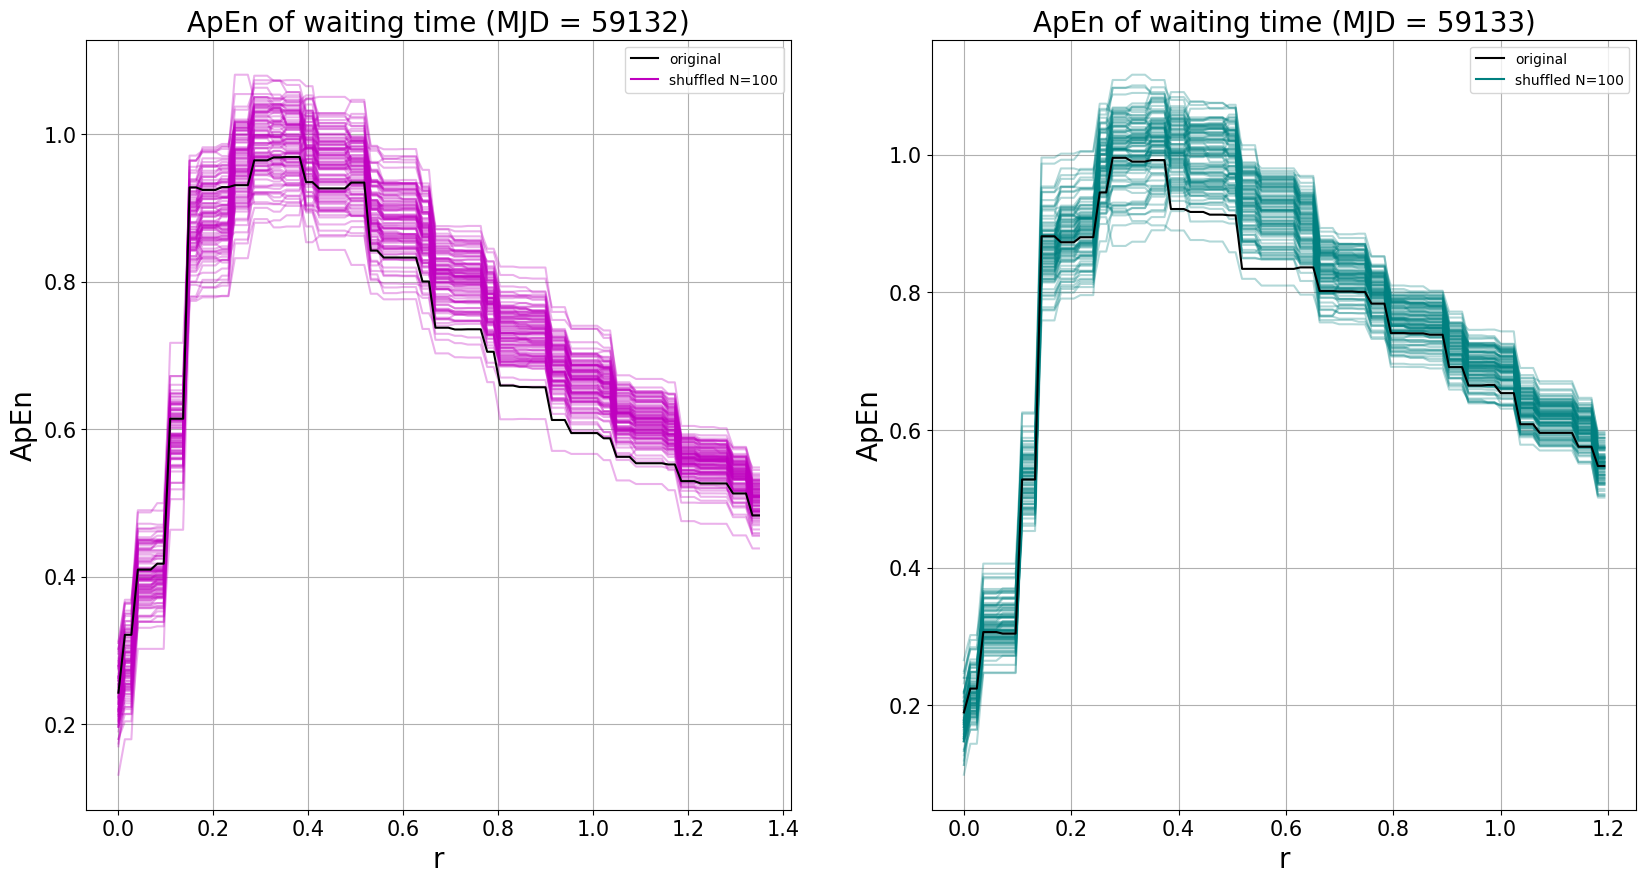

In [27]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(r_t_59132,Adt_results_59132 , c='m', alpha=0.3)
plt.plot(r_t_59132, wt_apen_59132, c='black', label='original')
plt.plot([], [], label='shuffled N=100', color='m')
plt.xlabel('r', fontsize=20)
plt.ylabel('ApEn', fontsize=20)
plt.tick_params(axis = 'both', labelsize=15)
plt.title('ApEn of waiting time (MJD = 59132)',fontsize=20)
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(r_t_59133,Adt_results_59133 , c='teal', alpha=0.3)
plt.plot(r_t_59133, wt_apen_59133, c='black', label='original')
plt.plot([], [], label='shuffled N=100', color='teal')
plt.xlabel('r', fontsize=20)
plt.ylabel('ApEn', fontsize=20)
plt.tick_params(axis = 'both', labelsize=15)
plt.title('ApEn of waiting time (MJD = 59133)',fontsize=20)
plt.grid(True)

plt.legend()
plt.show()

In [28]:
r_E_59132 = np.linspace(0,np.std(energy_change_59132),100)
E_apen_59132 = []
for r in r_E_59132:
    E_apen_59132.append(ApEn(energy_change_59132, 2, r))
E_apen_59132 = np.array(E_apen_59132)
print(E_apen_59132)

[0.0027929  0.07534492 0.08126411 0.08126411 0.08126411 0.08126411
 0.08126411 0.14111801 0.45939355 0.48392183 0.48392183 0.48392183
 0.48392183 0.48088783 0.55230919 0.66328185 0.77389134 0.79832895
 0.79832895 0.79223584 0.79384564 0.79952366 0.86787741 0.85595
 0.89372181 0.8963824  0.8963824  0.89651805 0.89755756 0.91322134
 0.91845158 0.92231188 0.92332344 0.92332344 0.92332344 0.92775942
 0.91394991 0.91910701 0.84732912 0.85247676 0.85247676 0.85247676
 0.85247676 0.85923374 0.84243851 0.82060845 0.81449753 0.81390775
 0.81390775 0.81390775 0.81390775 0.79314335 0.77193184 0.75443659
 0.75293652 0.75293652 0.75293652 0.75147188 0.75183462 0.70983596
 0.68066771 0.67468869 0.67441781 0.67441781 0.67455793 0.68394315
 0.67785049 0.64130891 0.63346045 0.63334948 0.63272466 0.63272466
 0.62785097 0.62437568 0.61544935 0.5880416  0.58669767 0.5860212
 0.5860212  0.5860212  0.5802139  0.56891443 0.54709627 0.5476984
 0.54756896 0.54756896 0.55092542 0.55040263 0.52119848 0.50615873


In [29]:
r_E_59133 = np.linspace(0,np.std(energy_change_59133),100)
E_apen_59133 = []
for r in r_E_59133:
    E_apen_59133.append(ApEn(energy_change_59133, 2, r))
E_apen_59133 = np.array(E_apen_59133)
print(E_apen_59133)

[0.00283387 0.04390926 0.06444695 0.06444695 0.06444695 0.06444695
 0.21720997 0.29967852 0.31808524 0.32409213 0.32409213 0.44463262
 0.54454953 0.61189306 0.62003093 0.62003093 0.62816879 0.68186051
 0.80095437 0.80964134 0.81264479 0.81264479 0.81807989 0.82552249
 0.85527877 0.87282432 0.87474663 0.87474663 0.87025752 0.87617068
 0.89585823 0.89644029 0.89726295 0.89579047 0.8949869  0.89319452
 0.88934963 0.88733469 0.88733469 0.88733469 0.89041974 0.87178207
 0.85390677 0.85493539 0.85230515 0.85230515 0.84830763 0.83403739
 0.82324323 0.8222795  0.8222795  0.82564277 0.80847648 0.79517427
 0.76551025 0.76170134 0.76170134 0.76301866 0.75689578 0.72983012
 0.73255483 0.73270754 0.73181281 0.72508179 0.71548008 0.67322106
 0.67213285 0.67244424 0.67244424 0.67218259 0.66300047 0.64846423
 0.64825598 0.64815898 0.64240722 0.64343096 0.62273602 0.59404991
 0.58727666 0.58727666 0.58668784 0.58707716 0.57149304 0.56468997
 0.56487473 0.56487473 0.56517965 0.56295799 0.54130862 0.5350

In [30]:
# at 59132 E
# AdE_results_59132 = pd.DataFrame(columns=[f'iteration_{i+1}' for i in range(100)])
# for i in range(100):
#     np.random.shuffle(energy_change_59132)
#     apen = [ApEn(energy_change_59132, 2, r) for r in r_E_59132]
#     AdE_results_59132[f'iteration_{i+1}'] = apen
# AdE_results_59132

In [31]:
# at 59133 E
# AdE_results_59133 = pd.DataFrame(columns=[f'iteration_{i+1}' for i in range(100)])
# for i in range(100):
#     np.random.shuffle(energy_change_59133)
#     apen = [ApEn(energy_change_59133, 2, r) for r in r_E_59133]
#     AdE_results_59133[f'iteration_{i+1}'] = apen
# AdE_results_59133

In [32]:
# AdE_results_59132.to_csv('AdE_results_59132.csv',index=False)
# AdE_results_59133.to_csv('AdE_results_59133.csv',index=False)

In [33]:
AdE_results_59132 = pd.read_csv('AdE_results_59132.csv')
AdE_results_59133 = pd.read_csv('AdE_results_59133.csv')

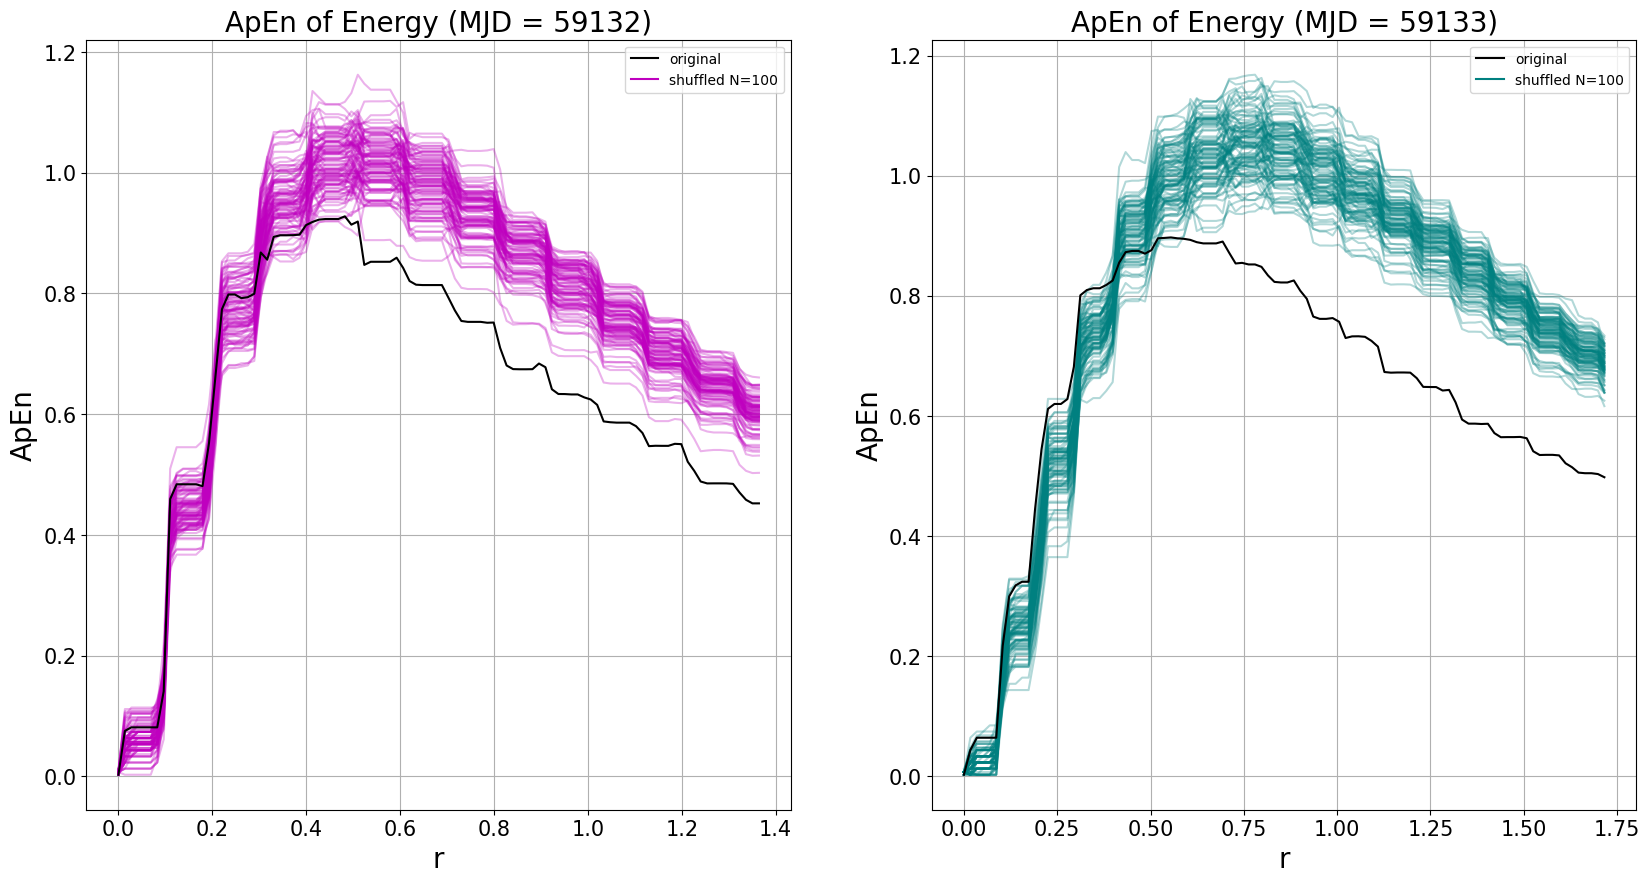

In [34]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(r_E_59132,AdE_results_59132 , c='m', alpha=0.3)
plt.plot(r_E_59132, E_apen_59132, c='black', label='original')
plt.plot([], [], label='shuffled N=100', color='m')
plt.xlabel('r', fontsize=20)
plt.ylabel('ApEn', fontsize=20)
plt.tick_params(axis = 'both', labelsize=15)
plt.title('ApEn of Energy (MJD = 59132)',fontsize=20)
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(r_E_59133,AdE_results_59133 , c='teal', alpha=0.3)
plt.plot(r_E_59133, E_apen_59133, c='black', label='original')
plt.plot([], [], label='shuffled N=100', color='teal')
plt.xlabel('r', fontsize=20)
plt.ylabel('ApEn', fontsize=20)
plt.tick_params(axis = 'both', labelsize=15)
plt.title('ApEn of Energy (MJD = 59133)',fontsize=20)
plt.grid(True)

plt.legend()
plt.show()

In [35]:
r_f_59132 = np.linspace(0,np.std(frequency_change_59132),100)
f_apen_59132 = []
for r in r_f_59132:
    f_apen_59132.append(ApEn(frequency_change_59132, 2, r))
f_apen_59132 = np.array(f_apen_59132)
print(f_apen_59132)

[0.00392891 0.00392891 0.08078169 0.09507338 0.12487103 0.16168646
 0.16816696 0.18230978 0.23932769 0.25361938 0.26348653 0.33615926
 0.36162798 0.40566304 0.44112697 0.4869114  0.53062581 0.56961792
 0.61794517 0.62630528 0.65697654 0.66918512 0.69894609 0.6994214
 0.69002832 0.66609131 0.68731644 0.70726004 0.70396468 0.73028989
 0.73840884 0.76553905 0.78087026 0.83736871 0.83483696 0.86600398
 0.87078233 0.86629031 0.87448377 0.89933185 0.90548342 0.90828559
 0.91424362 0.94540858 0.94489162 0.94585364 0.94598682 0.96498418
 0.97366572 0.99084343 0.96959066 0.97147083 0.97659397 0.98904786
 1.00683435 0.97769173 0.97895923 0.96723757 0.94316833 0.93331269
 0.92142345 0.90334967 0.90045844 0.897474   0.88969575 0.89585334
 0.89141847 0.8904532  0.86929066 0.86224445 0.86099699 0.85791536
 0.84032492 0.82777663 0.82614054 0.81793769 0.80915626 0.81514761
 0.79799027 0.78481354 0.76942126 0.76611201 0.76318477 0.74461485
 0.73957199 0.74000804 0.72652098 0.72315381 0.72770033 0.71655

In [36]:
r_f_59133 = np.linspace(0,np.std(frequency_change_59133),100)
f_apen_59133 = []
for r in r_f_59133:
    f_apen_59133.append(ApEn(frequency_change_59133, 2, r))
f_apen_59133 = np.array(f_apen_59133)
print(f_apen_59133)

[0.00938974 0.00938974 0.00356628 0.02947833 0.05270175 0.10452584
 0.11748186 0.14926263 0.16747366 0.1933857  0.23494238 0.25437642
 0.31219145 0.32514747 0.35093729 0.3714721  0.38662967 0.41807269
 0.51499268 0.5820439  0.61529641 0.63550473 0.67354799 0.71340073
 0.75945994 0.7967658  0.80534963 0.82163906 0.83291157 0.86920918
 0.87774834 0.91498778 0.90097796 0.94812486 0.95137476 0.95853344
 0.95575205 0.96840633 0.96468905 0.96641397 0.9634035  0.96406446
 0.9672957  0.95615264 0.93321732 0.96103312 0.95503802 0.96081208
 0.97073255 0.98554173 0.99055241 1.01224283 1.01013572 1.0149624
 1.01990681 1.0267512  0.98874572 0.99320784 0.94668716 0.94755894
 0.94670415 0.91710046 0.91534677 0.89268566 0.89682237 0.87778309
 0.89066651 0.88656937 0.86495939 0.85709371 0.84436801 0.85164168
 0.841209   0.8433323  0.83739601 0.82903652 0.82461138 0.8208934
 0.81736991 0.81586072 0.81462794 0.80643369 0.77251741 0.76269761
 0.74566964 0.73472685 0.71510198 0.71182521 0.70225704 0.694212

In [37]:
# Adf_results_59132 = pd.DataFrame(columns=[f'iteration_{i+1}' for i in range(100)])
# for i in range(100):
#     np.random.shuffle(frequency_change_59132)
#     apen = [ApEn(frequency_change_59132, 2, r) for r in r_f_59132]
#     Adf_results_59132[f'iteration_{i+1}'] = apen
# Adf_results_59132

In [38]:
# Adf_results_59133 = pd.DataFrame(columns=[f'iteration_{i+1}' for i in range(100)])
# for i in range(100):
#     np.random.shuffle(frequency_change_59133)
#     apen = [ApEn(frequency_change_59133, 2, r) for r in r_f_59133]
#     Adf_results_59133[f'iteration_{i+1}'] = apen
# Adf_results_59133

In [39]:
# Adf_results_59132.to_csv('Adf_results_59132.csv',index=False)
# Adf_results_59133.to_csv('Adf_results_59133.csv',index=False)

In [40]:
Adf_results_59132 = pd.read_csv('Adf_results_59132.csv')
Adf_results_59133 = pd.read_csv('Adf_results_59133.csv')

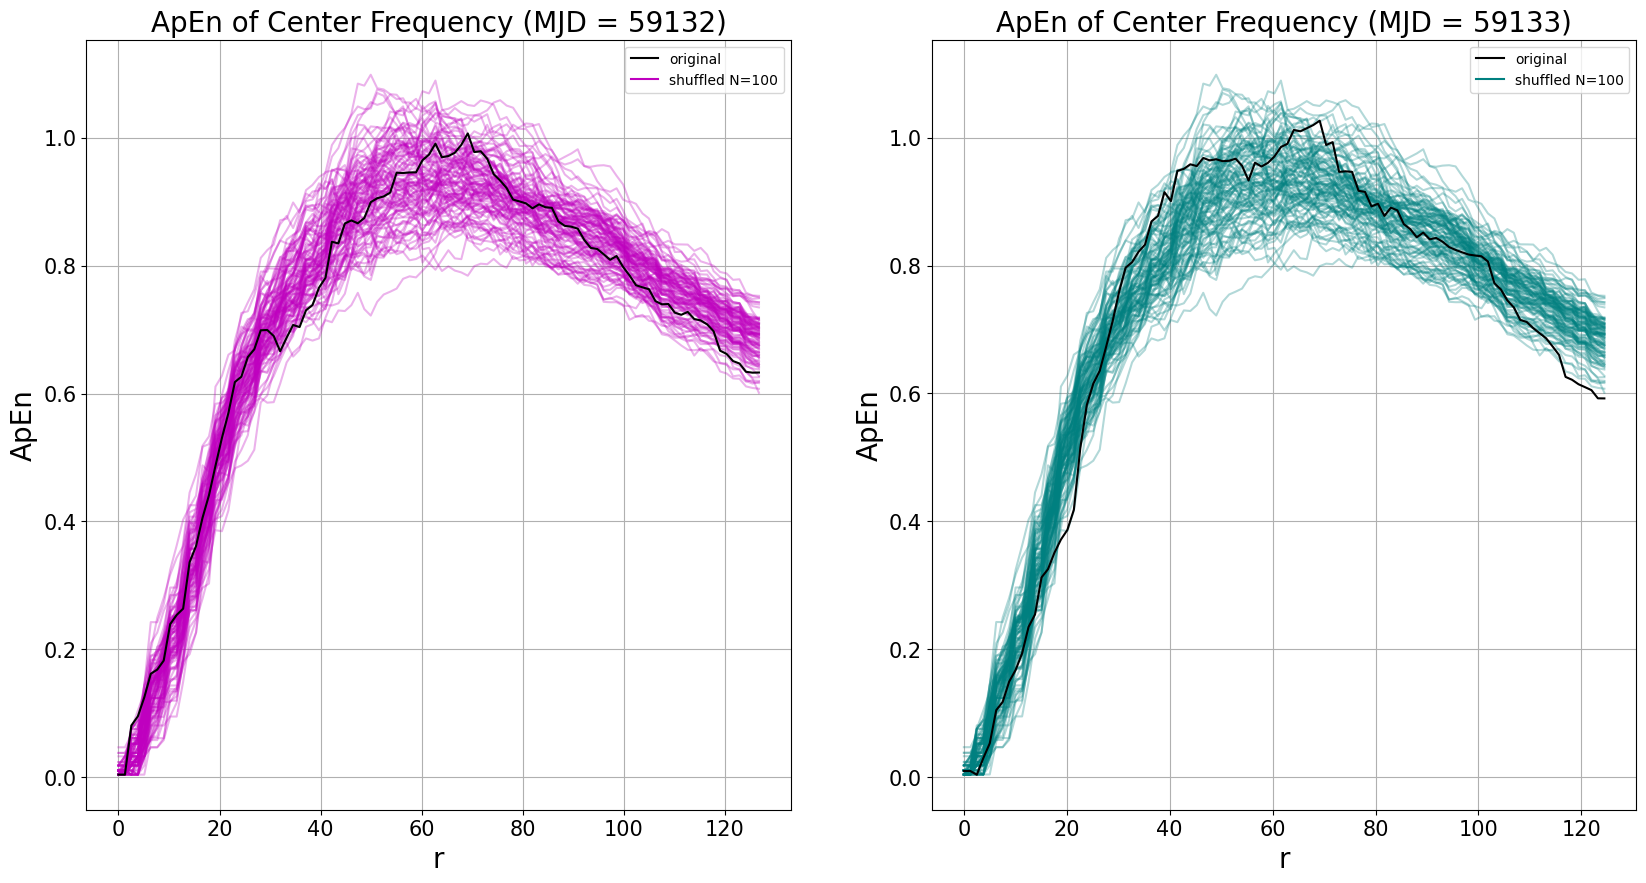

In [41]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(r_f_59132,Adf_results_59132 , c='m', alpha=0.3)
plt.plot(r_f_59132, f_apen_59132, c='black', label='original')
plt.plot([], [], label='shuffled N=100', color='m')
plt.xlabel('r', fontsize=20)
plt.ylabel('ApEn', fontsize=20)
plt.tick_params(axis = 'both', labelsize=15)
plt.title('ApEn of Center Frequency (MJD = 59132)',fontsize=20)
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(r_f_59133,Adf_results_59132 , c='teal', alpha=0.3)
plt.plot(r_f_59133, f_apen_59133, c='black', label='original')
plt.plot([], [], label='shuffled N=100', color='teal')
plt.xlabel('r', fontsize=20)
plt.ylabel('ApEn', fontsize=20)
plt.tick_params(axis = 'both', labelsize=15)
plt.title('ApEn of Center Frequency (MJD = 59133)',fontsize=20)
plt.grid(True)

plt.legend()
plt.show()

In [42]:
print("59132 time PI:", PI(wt_apen_59132, Adt_results_59132))
print("59133 time PI:", PI(wt_apen_59133, Adt_results_59133))
print("59132 energy PI:", PI(E_apen_59132, AdE_results_59132))
print("59133 energy PI:", PI(E_apen_59133, AdE_results_59133))
print("59132 frequency PI:", PI(f_apen_59132, Adf_results_59132))
print("59133 frequency PI:", PI(f_apen_59133, Adf_results_59133))

59132 time PI: (0.9697341199925628, 0.03819769762333649)
59133 time PI: (0.9699683206657231, 0.03854260250096766)
59132 energy PI: (0.8936167702250002, 0.03472201794730833)
59133 energy PI: (0.8411518192818928, 0.035347217674244424)
59132 frequency PI: (1.0463336589201442, 0.05850379542829614)
59133 frequency PI: (0.9810783600755971, 0.047318871935811115)
